In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv("./data/1_train1.csv")
data = data.fillna(0)
del data[data.columns[0]]
X = data.iloc[:, :-1]
y = data['y']

y.value_counts()

0    5444
1    1044
Name: y, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed, stratify=y)

In [33]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
oversample = BorderlineSMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)
y_over.value_counts()


0    4083
1    4083
Name: y, dtype: int64

In [24]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler

clf1 = LogisticRegression(penalty='l2', C=100, random_state=random_seed)
clfk = make_pipeline([StandardScaler(), clf1])



clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=random_seed)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
clf4 = SVC(degree=2, probability=True, random_state=random_seed)
clf5 = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=random_seed)

clf_labels = ['LR', 'DT', 'KNN', 'SVC', 'RFC']
clfs = [clf1, clf2, clf3, clf4, clf5]
print('10-fold cross validation:\n')
for clf, label in zip(clfs, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_over, y=y_over, cv=10, scoring='roc_auc')
    print("ROC AUC: %.2f(+/- %0.2f) [%s]" % (scores.
                                             mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.71(+/- 0.01) [LR]
ROC AUC: 0.64(+/- 0.02) [DT]
ROC AUC: 0.89(+/- 0.02) [KNN]
ROC AUC: 0.83(+/- 0.03) [SVC]
ROC AUC: 0.97(+/- 0.04) [RFC]


In [25]:
from sklearn.metrics import f1_score
for (idx, clf) in enumerate(clfs):
    clf.fit(X=X_over, y=y_over)
    print("%s f1_score: %.4f%%" %(clf_labels[idx], f1_score(y_test, clf.predict(X_test)) * 100))

LR f1_score: 35.1526%
DT f1_score: 29.0710%
KNN f1_score: 35.3870%
SVC f1_score: 38.7471%
RFC f1_score: 27.5362%


In [27]:
from xgboost.sklearn import XGBClassifier
clf6 = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10,random_state=random_seed)
score6 = cross_val_score(estimator=clf6, X=X_over, y=y_over, cv=10, scoring='roc_auc')
print("ROC AUC: %.2f(+/- %0.2f) [%s]" % (score6.
                                             mean(), score6.std(), "XGB"))
clf6.fit(X=X_over, y=y_over)
print("%s f1_score: %.4f%%" %("XGB", f1_score(y_test, clf6.predict(X_test)) * 100))

[15:57:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c09

In [38]:
from sklearn.naive_bayes import GaussianNB
clf7 = GaussianNB()
clf7.fit(X_over, y_over)
print("%s f1_score: %.4f%%" %("BAYES", f1_score(y_test, clf7.predict(X_test)) * 100))


BAYES f1_score: 28.8947%


In [28]:
from Python.machine_learning.MajorityVoteClassifier import MajorityVoteClassifier

mv_clf = MajorityVoteClassifier(classifiers=[clf1, clf3, clf4, clf5, clf6])
clf_labels += ['Majority voting']
clfs.append(mv_clf)
scores = cross_val_score(estimator=mv_clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

[15:58:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:58:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c09

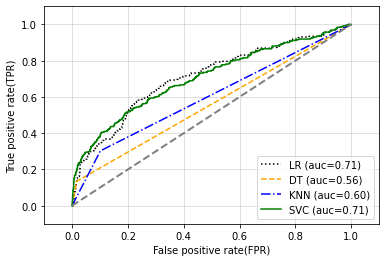

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green', 'cyan', 'olive']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(clfs, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc=%.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.show()


In [ ]:
test_data = pd.read_csv("test.csv")
test_pred = clf1.predict(test_data)
test_all = pd.concat([test_data, pd.DataFrame(test_pred, columns=['y'])], axis=1)
test_all = test_all[['主页ID', 'y']]
test_all.save("yourname_result.csv")